In [144]:
import numpy as np
import pandas as pd
import nltk
import itertools

In [145]:
data = pd.read_csv('job_skills.csv')
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [146]:
data = data.rename(columns = {'Minimum Qualifications':'Minimum', 'Preferred Qualifications':'Preferred'})
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum,Preferred
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [147]:
data = data.dropna(how='any',axis='rows')

In [148]:
data.Category.value_counts()

Sales & Account Management          168
Marketing & Communications          165
Finance                             115
Technical Solutions                 100
Business Strategy                    98
People Operations                    86
User Experience & Design             84
Program Management                   72
Partnerships                         59
Product & Customer Support           50
Legal & Government Relations         46
Administrative                       40
Sales Operations                     31
Real Estate & Workplace Services     25
Software Engineering                 24
Hardware Engineering                 22
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
Technical Writing                     5
Developer Relations                   5
IT & Data Management                  5
Data Center & Network                 2
Name: Category, dtype: int64

In [149]:
data.columns

Index(['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum', 'Preferred'],
      dtype='object')

In [150]:
sam_r = data[data.Category=='Sales & Account Management']['Responsibilities']
mc_r = data[data.Category=='Marketing & Communications']['Responsibilities']
f_r = data[data.Category=='Finance']['Responsibilities']
ts_r = data[data.Category=='Technical Solutions']['Responsibilities']
bs_r = data[data.Category=='Business Strategy']['Responsibilities']

In [151]:
type(sam_r)

pandas.core.series.Series

In [152]:
len(sam_r)

168

In [153]:
def get_nouns(series):
    series = [nltk.pos_tag(nltk.word_tokenize(item)) for item in list(series)]
    series = [[word[0].lower() for word in item if word[1] in ['NN', 'NNS', 'NNP', 'NNPS']] for item in series]
    return ' '.join(list(itertools.chain.from_iterable(series)))

In [154]:
get_nouns(sam_r)

"consult customers issues product knowledge tools documentation implementations product serviceability act liaison engineering product teams solutions partners customers provide product solution improvements market opportunities managers engineering provide implementation support customer environment guidance implementation feasibility cross-product integrations build relationships partners levels organization needs needs partnership plans work stakeholders partnership business objectives design implement business growth training initiatives partnership goals support strategies build awareness skills programs initiatives drive stakeholders metrics insights business search book business area identify opportunities customer marketing investment mobile relationships consultant customers advertising growth simplify google advertising offering sales customers liaison teams customers beta tests product launches support product strategies product team feedback product needs manage teams accou

In [155]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
def create_wordcloud(title,text,image_route):
    G = np.array(Image.open(image_route))
    text = get_nouns(text)
    sns.set(rc={'figure.figsize':(15,10)})
    wordcloud = WordCloud(mask=G,background_color="white",max_words=200,max_font_size=400).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(title,size=16)
    plt.show()

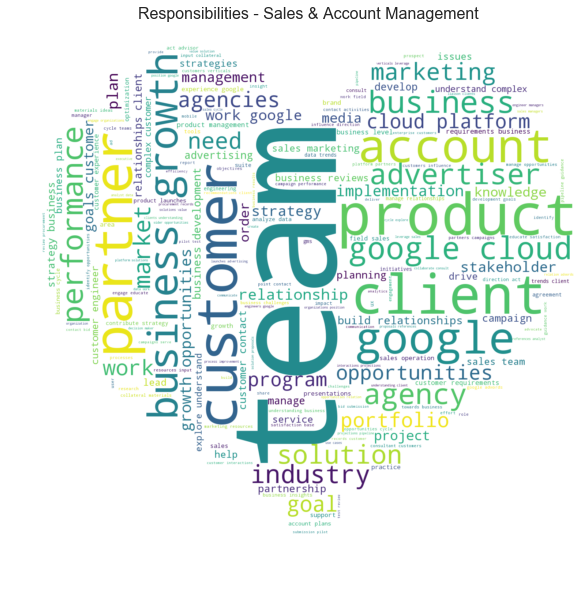

In [157]:
create_wordcloud('Responsibilities - Sales & Account Management', sam_r, 'bg.png')

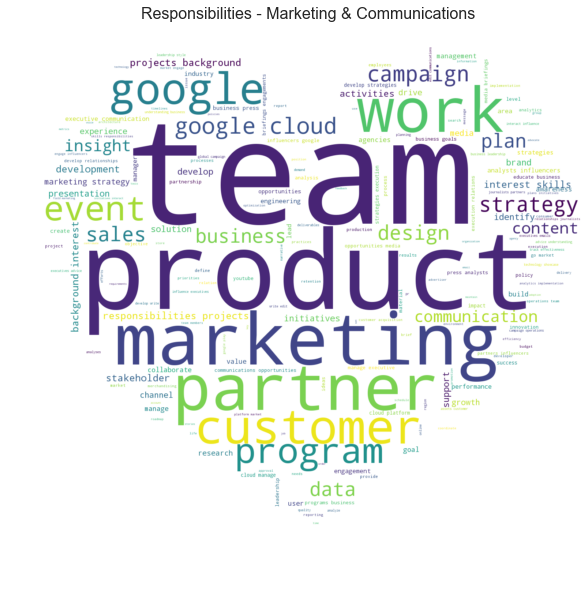

In [158]:
create_wordcloud('Responsibilities - Marketing & Communications', mc_r, 'bg.png')

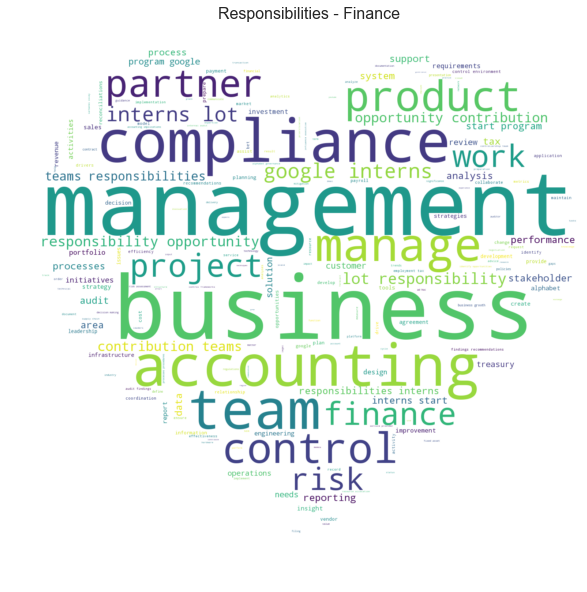

In [159]:
create_wordcloud('Responsibilities - Finance', f_r, 'bg.png')

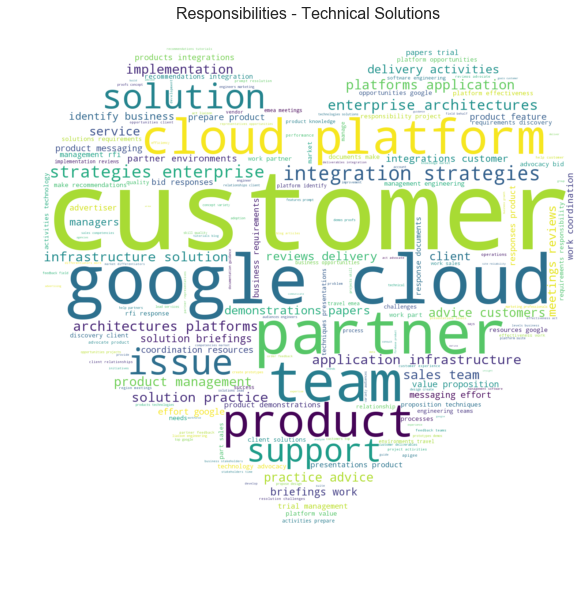

In [160]:
create_wordcloud('Responsibilities - Technical Solutions', ts_r, 'bg.png')

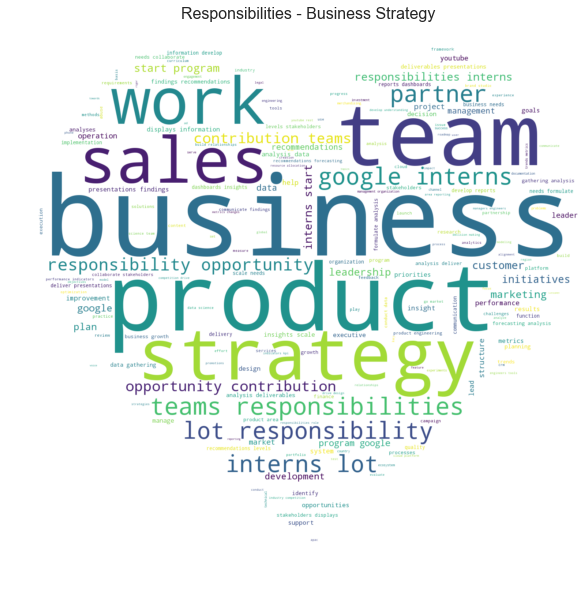

In [161]:
create_wordcloud('Responsibilities - Business Strategy', bs_r, 'bg.png')